# Top YouTubers data anaylsis

## 1. Loading necessary libraries and dataset

#### 1.1 Import necessary libraries, and read dataset:

In [29]:
# Data
import pandas as pd
import numpy as np

# For Visualization

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Setting color palette
color_scheme = px.colors.sequential.Purpor

#### 1.2 Read CSV File:

In [16]:
# Read the CSV file using an alternative encoding like 'latin1'
df = pd.read_csv("D:/Github/Top_youtubers_data_analysis_python_sql_powerbi/youtubers_df.csv", encoding='latin1')


In [17]:
print(df.shape)
df.head(10)

(735, 9)


,Rank,Username,Categories,Subscribers,Country,Views,Likes,Comments,Links
0,1,tseries,Music,249500000,India,86200,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videogame, Humor, film",183500000,United States,117400000,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Education,165500000,Unknown,7000000,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,"Television, General Entertainment channels",162600000,India,15600,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animation, Toys",113500000,Unknown,3900000,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"Film, Videogame, Humor",111500000,United States,2400000,197300,4900,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,7,LikeNastyaofficial,"Toys, Kid's Entertainment",107500000,Unknown,2600000,28000,0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...
7,8,VladandNiki,"Animation, Toys",101400000,Unknown,4100000,22100,0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...
8,9,zeemusiccompany,Music,99700000,India,74300,2600,32,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...
9,10,WWE,Sports Entertainers,97200000,United States,184500,6300,214,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...


#### 1.3 Checking null value:

In [18]:
#checking missing value

missing_value = pd.isnull(df).sum()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Rank         735 non-null    int64 
 1   Username     735 non-null    object
 2   Categories   735 non-null    object
 3   Subscribers  735 non-null    int64 
 4   Country      735 non-null    object
 5   Views        735 non-null    int64 
 6   Likes        735 non-null    int64 
 7   Comments     735 non-null    int64 
 8   Links        735 non-null    object
dtypes: int64(5), object(4)
memory usage: 51.8+ KB


No null value


## 2. Overall insights

#### 2.1 Most common categories amoung the YouTuber's:

In [43]:
#counting most common categories amoung youtuber
common_categories = df['Categories'].value_counts().head(10)

#plotting pie chart
fig = px.pie(values=common_categories.values, names=common_categories.index,  color_discrete_sequence= color_scheme
)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout(
    title_text="Category Pie Graph",
    uniformtext_minsize=10,
    uniformtext_mode='hide'
    
)

fig.show()


#### 2.2 Countries have most Youtube representative:


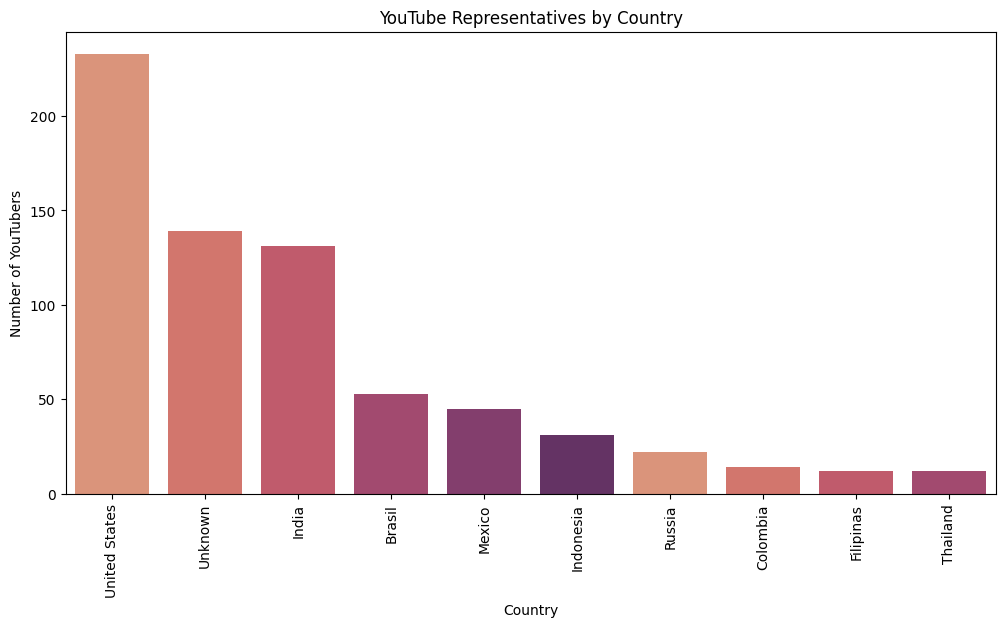

In [21]:
# Count the number of representatives per country
country_counts = df['Country'].value_counts().head(10)


# Setting a pastel color palette using Seaborn
pastel_colors = sns.color_palette('flare')

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette=pastel_colors)
plt.title('YouTube Representatives by Country')
plt.xlabel('Country')
plt.ylabel('Number of YouTubers')
plt.xticks(rotation=90)  

# Rotate x-axis labels for better readability
plt.show()

## 3. Category Analysis

#### 3.1 Top 10 category have more subscriber, viwes, likes and comments on average:

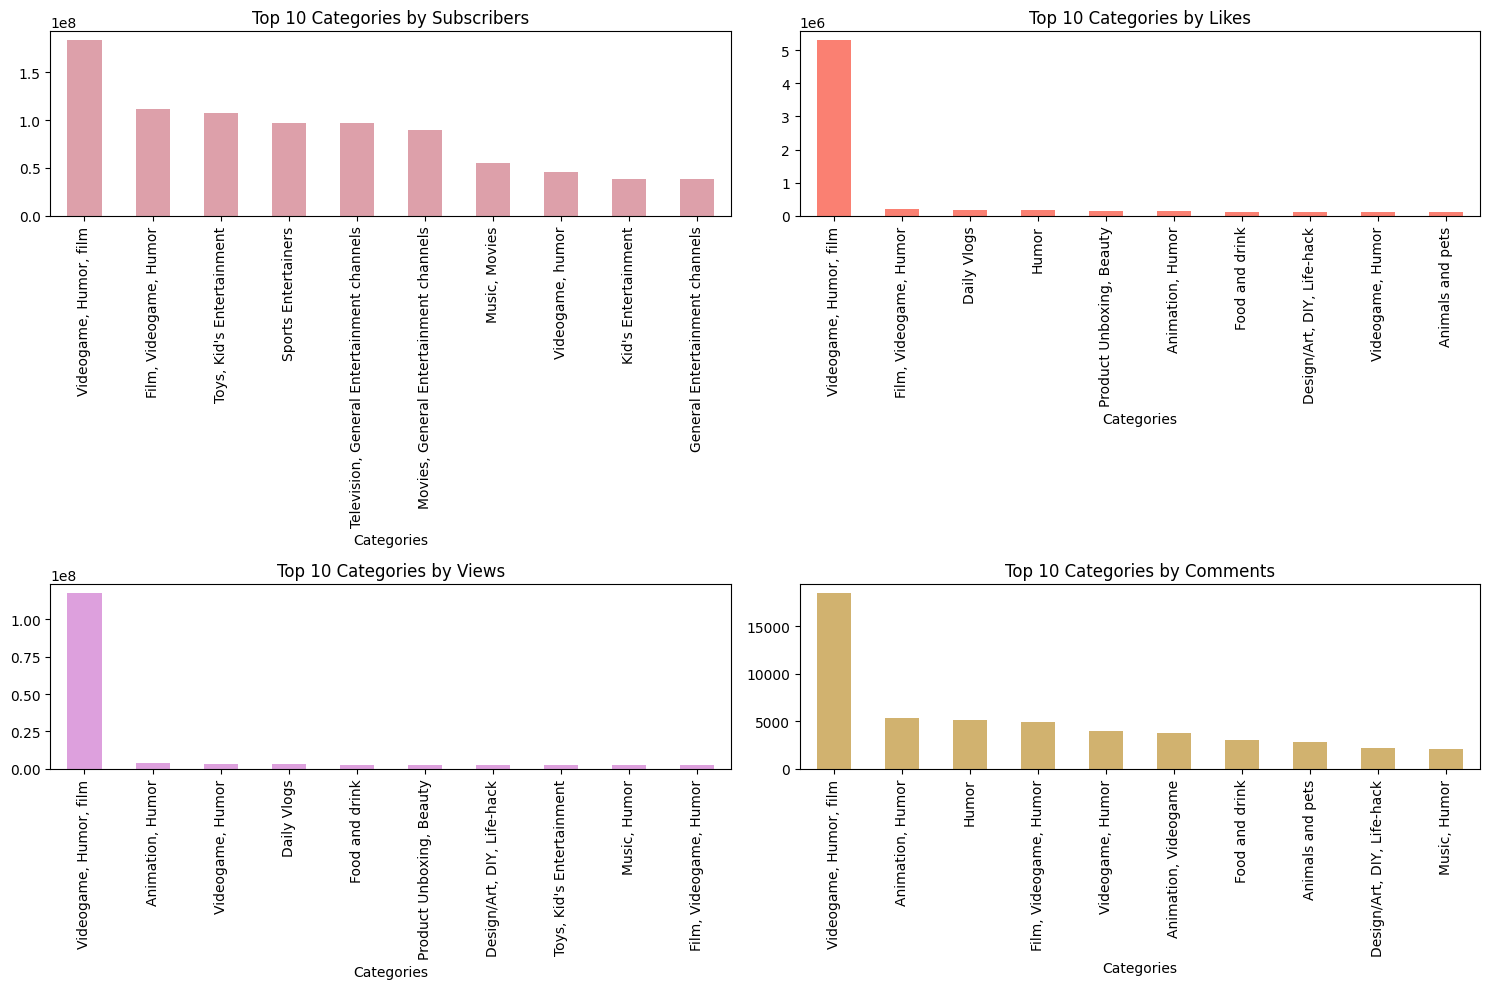

In [22]:
# Group by 'Categories' and calculate the mean
category_engagement = df.groupby('Categories')[['Subscribers', 'Views', 'Likes', 'Comments']].mean()

# Find the top 10 categories based on each metric
top_10_subscribers = category_engagement['Subscribers'].nlargest(10)
top_10_likes = category_engagement['Likes'].nlargest(10)
top_10_views = category_engagement['Views'].nlargest(10)
top_10_comments = category_engagement['Comments'].nlargest(10)

# Visualize the results using a bar chart
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

top_10_subscribers.plot(kind='bar', ax=axes[0, 0], color='#DDA0AA')
axes[0, 0].set_title('Top 10 Categories by Subscribers')

top_10_likes.plot(kind='bar', ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Top 10 Categories by Likes')

top_10_views.plot(kind='bar', ax=axes[1, 0], color='#DDA0DD')
axes[1, 0].set_title('Top 10 Categories by Views')

top_10_comments.plot(kind='bar', ax=axes[1, 1], color='#D1B26F')
axes[1, 1].set_title('Top 10 Categories by Comments')

plt.tight_layout()
plt.show()


## 4.Country-based Anaylsis:

#### 4.1 Country have most popular youtuber's ?

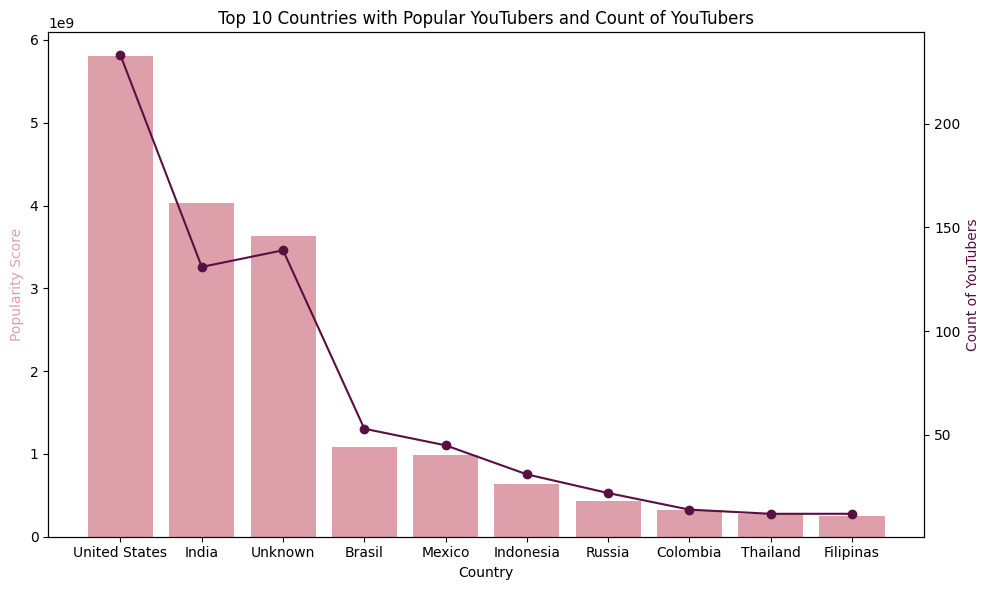

In [23]:
# Group by 'Country' and calculate the sum of metrics and count of YouTubers
country_data = df.groupby('Country').agg({
    'Subscribers': 'sum',
    'Views': 'sum',
    'Likes': 'sum',
    'Comments': 'sum',
    'Username': 'count'  # Count of YouTubers
})

# Create a unified score by summing the metrics
country_data['Popularity Score'] = country_data[['Subscribers', 'Views', 'Likes', 'Comments']].sum(axis=1)

# Find the top 10 countries based on the total popularity score
top_10_countries = country_data['Popularity Score'].nlargest(10)

# Plot the results using a combined bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(top_10_countries.index, top_10_countries, color='#DDA0AA')
ax1.set_xlabel('Country')
ax1.set_ylabel('Popularity Score', color='#DDA0AA')

ax2 = ax1.twinx()  # Create a secondary y-axis
ax2.plot(top_10_countries.index, country_data.loc[top_10_countries.index, 'Username'], color='#580F41', marker='o')
ax2.set_ylabel('Count of YouTubers', color='#580F41')

plt.title('Top 10 Countries with Popular YouTubers and Count of YouTubers')
plt.xticks(rotation=45)  # Rotate x labels for better readability

plt.tight_layout()
plt.show()


## 5. Engagement metrics:

#### 5.1 Average number of likes and comments for top youtubers:

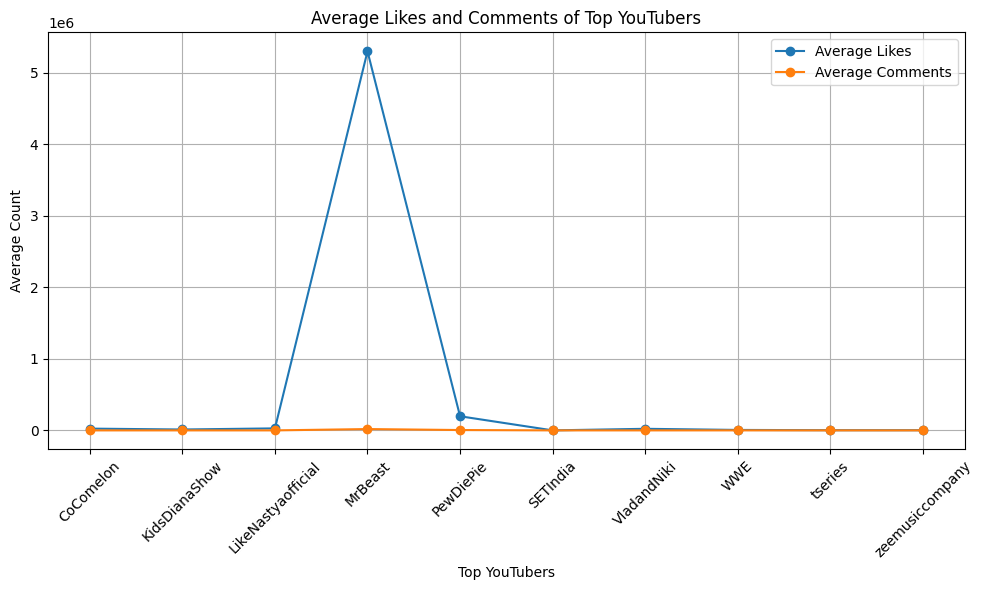

In [45]:
# Select the top YouTubers based on their ranks (e.g., top 10 YouTubers)
top_youtubers = df[df['Rank'] <= 10]

# Group by 'Username' and calculate the average number of likes and comments
youtuber_stats = top_youtubers.groupby('Username').agg({
    'Likes': 'mean',
    'Comments': 'mean'
})

# Plot the information on a line graph
plt.figure(figsize=(10, 6))

# Line plot for average Likes
plt.plot(youtuber_stats.index, youtuber_stats['Likes'], marker='o', label='Average Likes')

# Line plot for average Comments
plt.plot(youtuber_stats.index, youtuber_stats['Comments'], marker='o', label='Average Comments')

plt.title('Average Likes and Comments of Top YouTubers')
plt.xlabel('Top YouTubers')
plt.ylabel('Average Count')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 5.2 Correlation between likes, views, subscribers

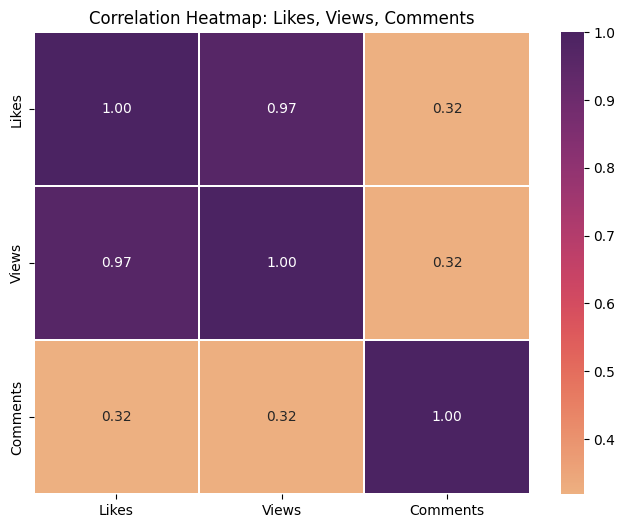

In [25]:
# Selecting required columns for correlation analysis
selected_columns = df[['Likes', 'Views', 'Comments']]


# Calculating the correlation matrix
correlation_matrix = selected_columns.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt=".2f", linewidth=.10)
plt.title('Correlation Heatmap: Likes, Views, Comments')

plt.show()


#### 5.3 Which categories have more subscriber 

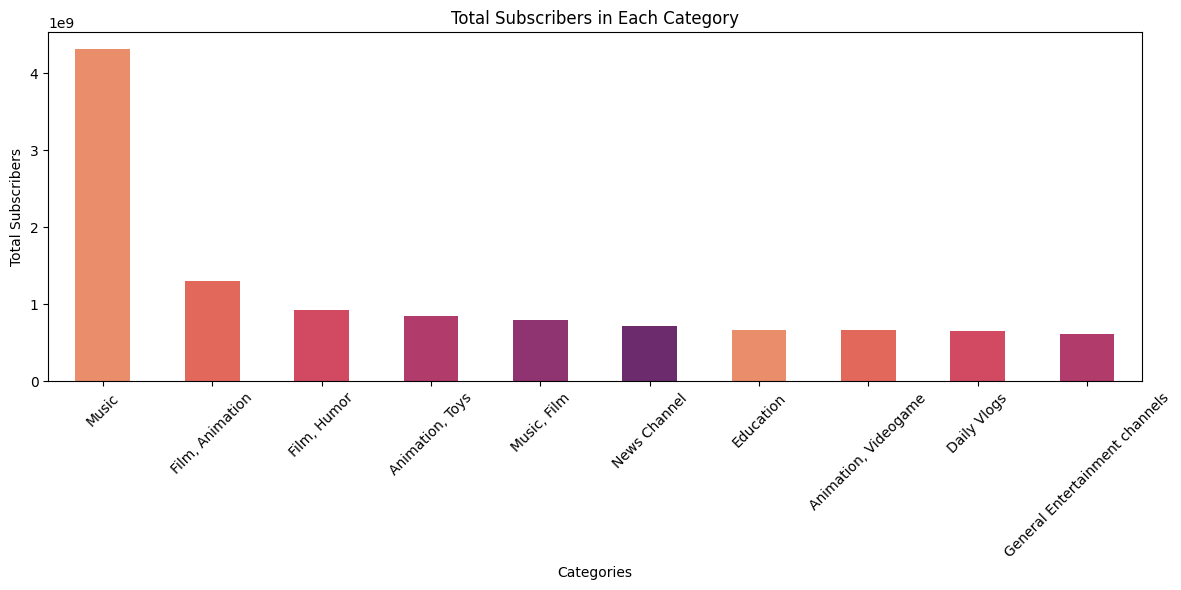

In [26]:
# Grouping by 'Categories' and summing the subscribers
category_subscribers = df.groupby('Categories')['Subscribers'].sum().sort_values(ascending=False).head(10)

# Setting a pastel color palette using Seaborn
pastel_colors = sns.color_palette('flare')

# Plotting the data with the pastel color palette
plt.figure(figsize=(12, 6))
category_subscribers.plot(kind='bar', color=pastel_colors)
plt.title('Total Subscribers in Each Category')
plt.xlabel('Categories')
plt.ylabel('Total Subscribers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 5.4 Youtuber with Most Subscribers by Each Category

In [38]:
# Grouping by category and finding the sum of subscribers in each category
subscriber_by_category = df.groupby('Categories')['Subscribers'].sum().reset_index().head(30)

# Sorting the data by subscribers to find the top categories
top_categories = subscriber_by_category.sort_values(by='Subscribers', ascending=False)

# Creating a treemap using Plotly
fig = px.treemap(top_categories, path=['Categories'], values='Subscribers', 
                 color_discrete_sequence= color_scheme,
                title = ' Youtuber with most subscribers in each category')

# Updating the layout for pastel colors
fig.update_traces(marker=dict(line=dict(color='white', width=0.5)))

# Display the Treemap
fig.show()


## 6.Top 5 youtubers analysis

#### Top 5 Youtubers with (1)subscribers (2)Views (3)Likes

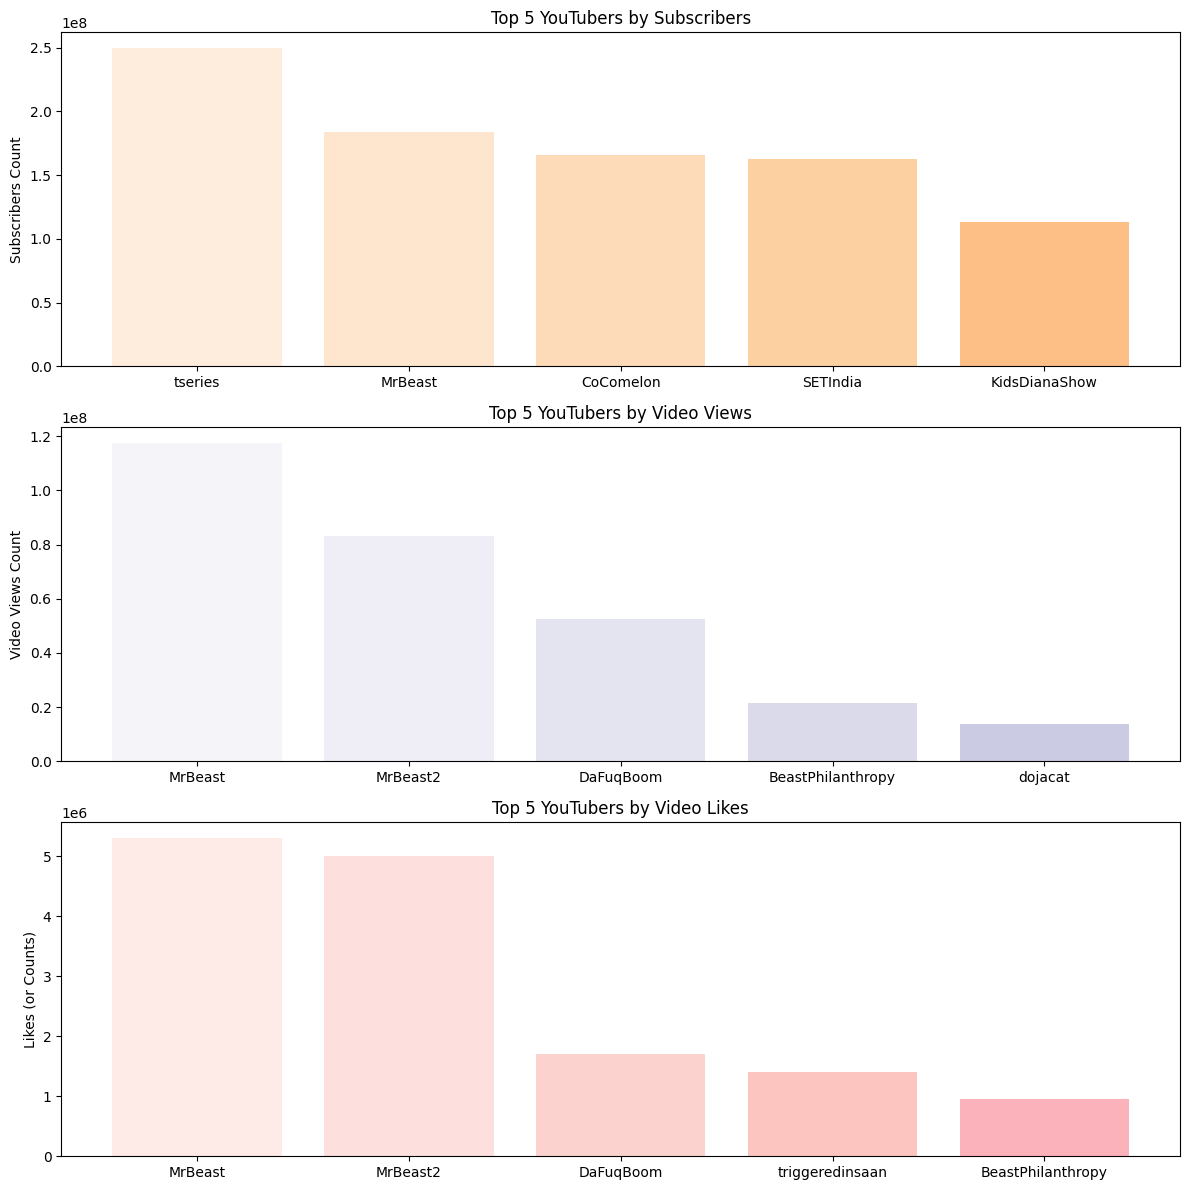

In [28]:
# Sort the DataFrame by subscribers, video views, and video likes
subscribers_sorted = df.sort_values('Subscribers', ascending=False)[:5]
video_views_sorted = df.sort_values('Views', ascending=False)[:5]
video_likes_sorted = df.sort_values('Likes', ascending=False)[:5]


# Setting a pastel color palette using Seaborn
colors1 = sns.color_palette("Oranges",15)
colors2 = sns.color_palette("Purples",15)
colors3 = sns.color_palette("RdPu",15)

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 12))

# Plot top subscribers
ax1.bar(subscribers_sorted['Username'], subscribers_sorted['Subscribers'], color = colors1)
ax1.set_title('Top 5 YouTubers by Subscribers')
ax1.set_ylabel('Subscribers Count')

# Plot top video views
ax2.bar(video_views_sorted['Username'], video_views_sorted['Views'], color = colors2)
ax2.set_title('Top 5 YouTubers by Video Views')
ax2.set_ylabel('Video Views Count')

# Plot top video likes 
ax3.bar(video_likes_sorted['Username'], video_likes_sorted['Likes'], color = colors3)
ax3.set_title('Top 5 YouTubers by Video Likes')
ax3.set_ylabel('Likes (or Counts)')

plt.tight_layout()
plt.show()
